In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import math

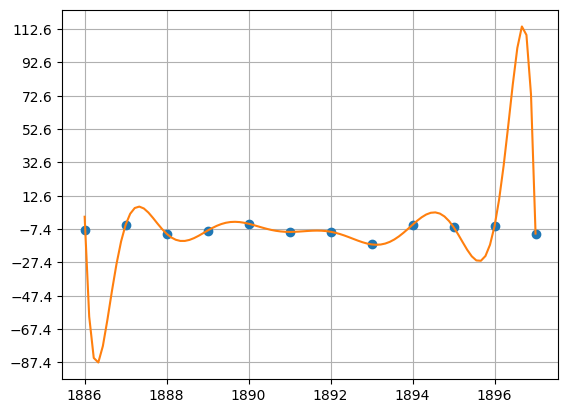

In [5]:


def read():
    with open('25_Pskov.csv', encoding='utf-8') as file:
        reader = csv.reader(file, delimiter=',')
        lst = []
        for row in reader:
            lst.append(row)
    return lst


def lagranz(x, y, t):
    res = 0
    for i in range(1, len(y)):
        d1 = 1
        d2 = 1
        for j in range(len(x)):
            if i != j:
                d1 = d1 * (t - x[j])
                d2 = d2 * (x[i] - x[j])
        res = res + y[i] * d1 / d2
    return res


def viewLagranz():
    lst = read()
    x = []
    y = []
    for i in range(13, 25, 1):
        x.append(float(lst[i][0]))
        y.append(float(lst[i][1]))
    xnew = np.linspace(np.min(x), np.max(x), 100)
    ynew = []
    for i in xnew:
        ynew.append(lagranz(x, y, i))
    plt.plot(x, y, 'o', xnew, ynew)
    plt.yticks(np.arange(min(ynew), max(ynew), 20))
    plt.grid(True)
    plt.show()

viewLagranz()

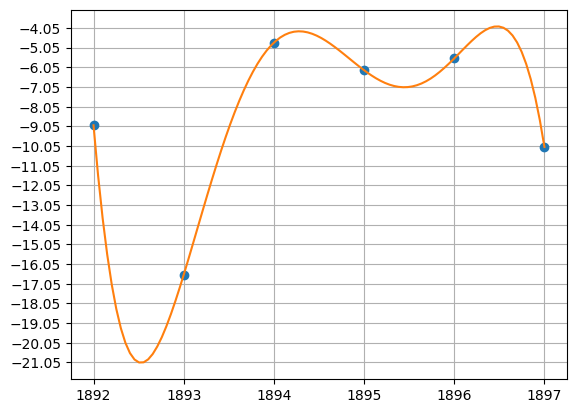

In [4]:
def con_diff(y, m, k):
    if m == 1:
        return y[k + 1] - y[k]
    else:
        return con_diff(y, m - 1, k + 1) - con_diff(y, m-1, k)


def newton(x, y, t):
    res = y[0]
    h = 1
    q = (t - x[0]) / h
    for i in range(1, len(y)):
        temp = 1
        for j in range(i):
            temp *= (q - j)
        res += temp * con_diff(y, i, 0) / math.factorial(i)
    return res


def newtonView():
    lst = read()
    x = []
    y = []
    for i in range(19, 25, 1):
        x.append(float(lst[i][0]))
        y.append(float(lst[i][1]))
    xnew = np.linspace(np.min(x), np.max(x), 100)
    ynew = []
    for i in xnew:
        ynew.append(newton(x, y, i))
    plt.plot(x, y, 'o', xnew, ynew)
    plt.yticks(np.arange(min(ynew), max(ynew), 1))
    plt.grid(True)
    plt.show()
    
newtonView()    

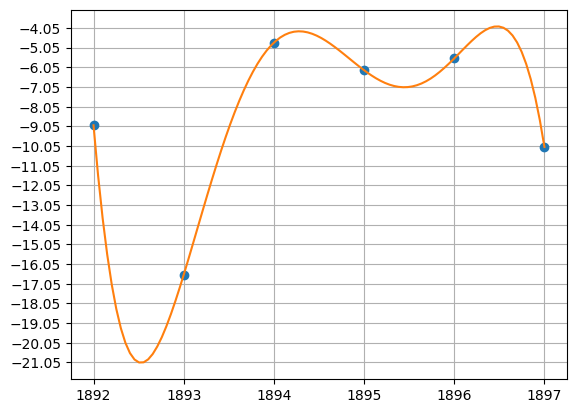

In [5]:
def cof(y, m, k):
    if m == 1:
        return y[k + 1] - y[k]
    else:
        return con_diff(y, m - 1, k + 1) - con_diff(y, m-1, k)


def newton2(x, y, t):
    res = y[-1]
    h = 1
    q = (t - x[-1]) / h
    for i in range(1, len(y)):
        temp = 1
        for j in range(i):
            temp *= (q + j)
        res += temp * con_diff(y, i, len(y) - 1 - i) / math.factorial(i)
    return res


def newton2View():
    lst = read()
    x = []
    y = []
    for i in range(19, 25, 1):
        x.append(float(lst[i][0]))
        y.append(float(lst[i][1]))
    xnew = np.linspace(np.min(x), np.max(x), 100)
    ynew = []
    for i in xnew:
        ynew.append(newton2(x, y, i))
    plt.plot(x, y, 'o', xnew, ynew)
    plt.yticks(np.arange(min(ynew), max(ynew), 1))
    plt.grid(True)
    plt.show()
    
newton2View()      

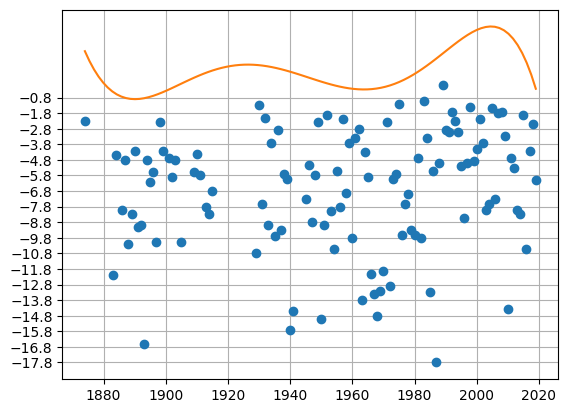

In [8]:
def approx(x, y, t, n):
    x0 = []
    for i in range(len(x)):
        x0.append([])
        for j in range(n + 1):
            x0[i].append(x[i] ** j)
    a = (np.linalg.inv(np.array(x0).transpose().dot(x0))).dot(np.array(x0).transpose()).dot(y)
    approx_function = a[0]
    for i in range(1, len(a)):
        approx_function += a[i] * t ** i
    return approx_function



def approxView():
    lst = read()
    x = []
    y = []
    for i in range(1, len(lst), 1):
        if lst[i][1] == '999.9':
            continue
        x.append(float(lst[i][0]))
        y.append(float(lst[i][1]))
    xnew = np.linspace(np.min(x), np.max(x), 100)
    ynew = []
    for i in xnew:
        ynew.append(approx(x, y, i, 15))
    plt.plot(x, y, 'o', xnew, ynew)
    plt.yticks(np.arange(min(y), max(y), 1))
    plt.grid(True)
    plt.show()

approxView()